In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x = tf.placeholder(tf.float32, [None, 5])
w = tf.Variable(tf.zeros([5, 1]))
y = tf.matmul(x, w)

In [10]:
t = tf.placeholder(tf.float32, [None, 1])
loss = tf.reduce_sum(tf.square(y - t))

In [11]:
train_step = tf.train.AdamOptimizer().minimize(loss)

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
    train_t = train_t.reshape([12, 1])
    
    train_x = np.zeros([12, 5])
    for row, month in enumerate(range(1, 13)):
        for col, n in enumerate(range(0, 5)):
            train_x[row][col] = month ** n
    
    i = 0
    for _ in range(200000):
        i += 1
        sess.run(train_step, feed_dict={x: train_x, t: train_t})
        if i % 10000 == 0:
            loss_val = sess.run(loss, feed_dict={x: train_x, t: train_t})
            print ('Step: %d, Loss: %f' % (i, loss_val))
    w_val = sess.run(w)
    print(w_val)

Step: 10000, Loss: 31.015018
Step: 20000, Loss: 29.294701
Step: 30000, Loss: 28.025995
Step: 40000, Loss: 27.321125
Step: 50000, Loss: 25.772881
Step: 60000, Loss: 24.780525
Step: 70000, Loss: 23.842400
Step: 80000, Loss: 22.976669
Step: 90000, Loss: 22.178181
Step: 100000, Loss: 42.597778
Step: 110000, Loss: 20.753553
Step: 120000, Loss: 20.128706
Step: 130000, Loss: 19.529371
Step: 140000, Loss: 18.985298
Step: 150000, Loss: 18.479834
Step: 160000, Loss: 18.012241
Step: 170000, Loss: 17.579357
Step: 180000, Loss: 17.178448
Step: 190000, Loss: 16.806240
Step: 200000, Loss: 16.461517
[[ 6.10654736]
 [-4.04239273]
 [ 2.51062512]
 [-0.28170168]
 [ 0.00834867]]


In [22]:
def predict(x):
    result = 0.0
    for n in range(0, 5):
        result += w_val[n][0] * x ** n
    return result

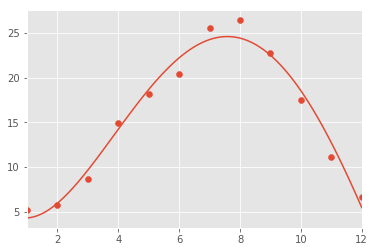

In [26]:
%matplotlib inline
plt.style.use('ggplot')
font = {'family' : 'meiryo'}
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.scatter(range(1, 13), train_t)
linex = np.linspace(1, 12, 100)
liney = predict(linex)
subplot.plot(linex, liney)